## Simple decapodes example
See https://algebraicjulia.github.io/Decapodes.jl/dev/overview/#Your-First-Decapode

In [49]:
using Pkg
using Decapodes
using Catlab, Catlab.Graphics

In [50]:
using GraphViz

Variable = @decapode begin
  C::Form0
end;

# to_graphviz(Variable)

In [51]:
Diffusion = @decapode begin
  (C, Ċ)::Form0
  ϕ::Form1

  # Fick's first law
  ϕ ==  k(d₀(C))
  # Diffusion equation
  Ċ == ⋆₀⁻¹(dual_d₁(⋆₁(ϕ)))
  ∂ₜ(C) == Ċ
end;

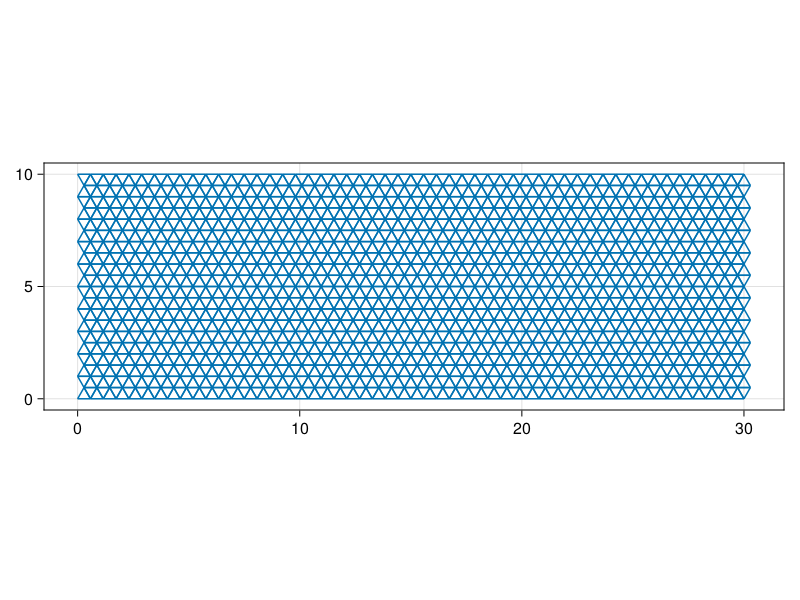

In [75]:
using Catlab.CategoricalAlgebra
using CombinatorialSpaces, CombinatorialSpaces.DiscreteExteriorCalculus
using CairoMakie

plot_mesh = loadmesh(Rectangle_30x10())
periodic_mesh = loadmesh(Torus_30x10())
point_map = loadmesh(Point_Map())

fig, ax, ob = wireframe(plot_mesh)
ax.aspect = AxisAspect(3.0)
fig


In [53]:
using MLStyle

function generate(sd, my_symbol; hodge=DiagonalHodge())
  op = @match my_symbol begin
    :k => x -> 0.05*x
    x => error("Unmatched operator $my_symbol")
  end
  return (args...) -> op(args...)
end

generate (generic function with 1 method)

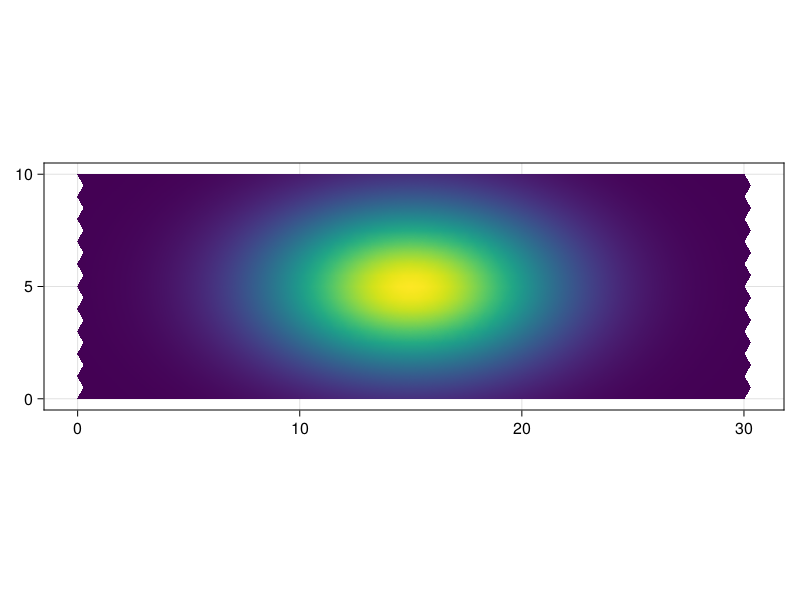

In [54]:
sim = eval(gensim(Diffusion))
fₘ = sim(periodic_mesh, generate, DiagonalHodge())

using Distributions
c_dist = MvNormal([15, 5], [4.5, 2.5])
c = [pdf(c_dist, [p[1], p[2]]) for p in periodic_mesh[:point]]

fig, ax, ob = mesh(plot_mesh; color=c[point_map])
ax.aspect = AxisAspect(3.0)
fig

In [48]:
using LinearAlgebra
using MultiScaleArrays
using OrdinaryDiffEq

u₀ = construct(PhysicsState, [VectorForm(c)], Float64[], [:C])

prob = ODEProblem(fₘ, u₀, (0.0, 100.0))
sol = solve(prob, Tsit5());

# Plot the result
times = range(0.0, 100.0, length=150)
colors = [findnode(sol(t), :C)[point_map] for t in times]

# Initial frame
fig, ax, ob = mesh(plot_mesh, color=colors[1], colorrange = extrema(vcat(colors...)))
ax.aspect = AxisAspect(3.0)
Colorbar(fig[1,2], ob)
framerate = 30

# Animation
record(fig, "diffusion.gif", range(0.0, 100.0; length=150); framerate = 30) do t
    ob.color = findnode(sol(t), :C)[point_map]
end

"diffusion.gif"

### Result
<img src="diffusion.gif" align="center">

In [60]:
gensim(Diffusion)

quote
    #= /home/jovyan/.julia/packages/Decapodes/f3TRX/src/simulation.jl:427 =#
    function simulate(mesh, operators, hodge = GeometricHodge())
        #= /home/jovyan/.julia/packages/Decapodes/f3TRX/src/simulation.jl:427 =#
        #= /home/jovyan/.julia/packages/Decapodes/f3TRX/src/simulation.jl:428 =#
        begin
            #= /home/jovyan/.julia/packages/Decapodes/f3TRX/src/simulation.jl:155 =#
            (M_d₀, d₀) = default_dec_matrix_generate(mesh, :d₀, hodge)
            (var"M_⋆₁", ⋆₁) = default_dec_matrix_generate(mesh, :⋆₁, hodge)
            (M_dual_d₁, dual_d₁) = default_dec_matrix_generate(mesh, :dual_d₁, hodge)
            (var"M_⋆₀⁻¹", ⋆₀⁻¹) = default_dec_matrix_generate(mesh, :⋆₀⁻¹, hodge)
            k = operators(mesh, :k)
        end
        #= /home/jovyan/.julia/packages/Decapodes/f3TRX/src/simulation.jl:429 =#
        begin
            #= /home/jovyan/.julia/packages/Decapodes/f3TRX/src/simulation.jl:214 =#
            var"•2" = Vector{Float64}(undef, npa

In [76]:
@which Torus_30x10

Decapodes